#Pre Processing the Data Set

In [2]:
import pandas as pd
data=pd.read_csv('dataset/spambase.data',header=None)

In [3]:
#remove duplicates
data.drop_duplicates(inplace=True)

print(data)

        0     1     2    3     4     5     6     7     8     9   ...     48  \
0     0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
1     0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
2     0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
3     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4596  0.31  0.00  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4598  0.30  0.00  0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4599  0.96  0.00  0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4600  0.00  0.00  0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   

         49   50     51     52     53     54   55  

In [4]:

# search for missing values
missing_values = data.isnull().sum().sum()

if missing_values > 0:
    print(missing_values, 'missing values available in the dataset.')
else:
    print('No available missing values in the dataset.')

No available missing values in the dataset.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

# instantiate the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training the KNN model

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [8]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# makeing predictions on the testing data
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score (y_test, y_pred)
recall = recall_score (y_test, y_pred)
f1 = f1_score (y_test,y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:",recall)
print("F1",f1)


Accuracy: 0.9073634204275535
Precision: 0.9088145896656535
Recall: 0.861671469740634
F1 0.8846153846153847


In [9]:
from sklearn.metrics import classification_report

# generate a classification report
report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.91      0.94      0.92       495
           1       0.91      0.86      0.88       347

    accuracy                           0.91       842
   macro avg       0.91      0.90      0.90       842
weighted avg       0.91      0.91      0.91       842



[[453  42]
 [ 40 307]]


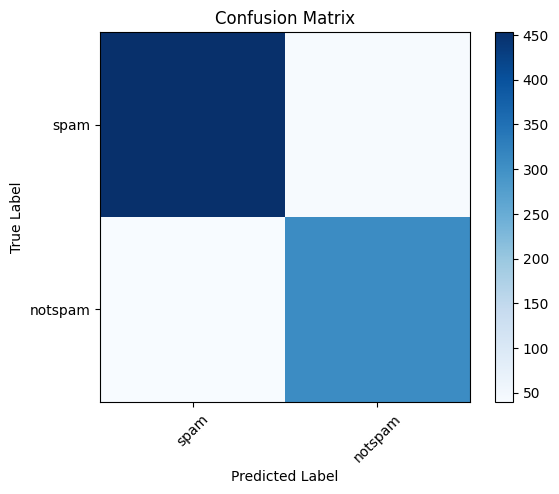

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

classes = ['spam','notspam']
matrix = confusion_matrix(y_test, y_pred)

print(matrix)

plt.imshow(matrix,cmap='Blues',interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes,rotation=45)
plt.yticks(tick_marks,classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Training the Decision tree model

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Training Decision Tree 
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# make predictions on the testing data
y_pred = tree.predict(X_test)

# calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)

# calculating the precision
precision = precision_score(y_test, y_pred)

# calculating the recall
recall = recall_score(y_test, y_pred)

# calculating the F1 score
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 :", f1)


Accuracy: 0.9038004750593824
Precision: 0.88
Recall: 0.8876080691642652
F1 : 0.8837876614060259


In [29]:
# generate a classification report
report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       495
           1       0.88      0.89      0.88       347

    accuracy                           0.90       842
   macro avg       0.90      0.90      0.90       842
weighted avg       0.90      0.90      0.90       842



[[453  42]
 [ 39 308]]


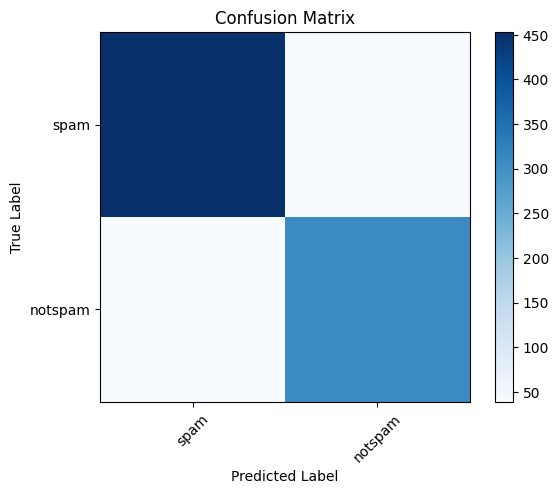

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

classes = ['spam','notspam']
matrix = confusion_matrix(y_test, y_pred)

print(matrix)

plt.imshow(matrix,cmap='Blues',interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes,rotation=45)
plt.yticks(tick_marks,classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()